In [183]:
"""Hello Analytics Reporting API V4."""

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'ga-python-297303-a8eb2d4054e8.json'  # gcp金鑰
VIEW_ID = '104584924' # GA資料檢視id

In [184]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(KEY_FILE_LOCATION, SCOPES)
# Build the service object.
analytics = build('analyticsreporting', 'v4', credentials=credentials)

response = analytics.reports().batchGet(body={
    'reportRequests': [{
        'viewId': VIEW_ID,
        'dateRanges': [{'startDate': '2016-01-01', 'endDate': '2019-12-31'}],
        'metrics': [
            {"expression": "ga:newUsers"},
            
        ], "dimensions": [
            {"name": "ga:yearMonth"}
        ]
    }]}).execute()
response

{'reports': [{'columnHeader': {'dimensions': ['ga:yearMonth'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:newUsers',
       'type': 'INTEGER'}]}},
   'data': {'rows': [{'dimensions': ['201601'],
      'metrics': [{'values': ['1893']}]},
     {'dimensions': ['201602'], 'metrics': [{'values': ['1931']}]},
     {'dimensions': ['201603'], 'metrics': [{'values': ['2700']}]},
     {'dimensions': ['201604'], 'metrics': [{'values': ['2175']}]},
     {'dimensions': ['201605'], 'metrics': [{'values': ['2006']}]},
     {'dimensions': ['201606'], 'metrics': [{'values': ['1854']}]},
     {'dimensions': ['201607'], 'metrics': [{'values': ['2753']}]},
     {'dimensions': ['201608'], 'metrics': [{'values': ['2037']}]},
     {'dimensions': ['201609'], 'metrics': [{'values': ['2108']}]},
     {'dimensions': ['201610'], 'metrics': [{'values': ['3298']}]},
     {'dimensions': ['201611'], 'metrics': [{'values': ['2337']}]},
     {'dimensions': ['201612'], 'metrics': [{'values': ['3382']}]},


In [185]:
{'reports': [{'columnHeader': {'dimensions': ['ga:deviceCategory'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:pageviews',
       'type': 'INTEGER'},
      {'name': 'ga:avgSessionDuration', 'type': 'TIME'}]}},
   'data': {'isDataGolden': True,
    'maximums': [{'values': ['485', '94.95454545454545']}],
    'minimums': [{'values': ['29', '51.21186440677966']}],
    'rowCount': 3,
    'rows': [{'dimensions': ['desktop'],
      'metrics': [{'values': ['485', '51.21186440677966']}]},
     {'dimensions': ['mobile'],
      'metrics': [{'values': ['409', '69.30859375']}]},
     {'dimensions': ['tablet'],
      'metrics': [{'values': ['29', '94.95454545454545']}]}],
    'totals': [{'values': ['923', '60.06487341772152']}]}}]}

{'reports': [{'columnHeader': {'dimensions': ['ga:deviceCategory'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:pageviews',
       'type': 'INTEGER'},
      {'name': 'ga:avgSessionDuration', 'type': 'TIME'}]}},
   'data': {'isDataGolden': True,
    'maximums': [{'values': ['485', '94.95454545454545']}],
    'minimums': [{'values': ['29', '51.21186440677966']}],
    'rowCount': 3,
    'rows': [{'dimensions': ['desktop'],
      'metrics': [{'values': ['485', '51.21186440677966']}]},
     {'dimensions': ['mobile'],
      'metrics': [{'values': ['409', '69.30859375']}]},
     {'dimensions': ['tablet'],
      'metrics': [{'values': ['29', '94.95454545454545']}]}],
    'totals': [{'values': ['923', '60.06487341772152']}]}}]}

In [186]:
import pandas as pd

def ga_response_dataframe(response):
    row_list = []
    # Get each collected report
    for report in response.get('reports', []):
        # Set column headers
        column_header = report.get('columnHeader', {})
        dimension_headers = column_header.get('dimensions', [])
        metric_headers = column_header.get('metricHeader', {}).get('metricHeaderEntries', [])
    
        # Get each row in the report
        for row in report.get('data', {}).get('rows', []):
            # create dict for each row
            row_dict = {}
            dimensions = row.get('dimensions', [])
            date_range_values = row.get('metrics', [])

            # Fill dict with dimension header (key) and dimension value (value)
            for header, dimension in zip(dimension_headers, dimensions):
                row_dict[header] = dimension

            # Fill dict with metric header (key) and metric value (value)
            for i, values in enumerate(date_range_values):
                for metric, value in zip(metric_headers, values.get('values')):
                # Set int as int, float a float
                    if ',' in value or '.' in value:
                        row_dict[metric.get('name')] = float(value)
                    else:
                        row_dict[metric.get('name')] = int(value)

            row_list.append(row_dict)
    return pd.DataFrame(row_list)
def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)

if __name__ == '__main__':
    analytics

In [187]:
df = ga_response_dataframe(response)
df

,ga:yearMonth,ga:newUsers
0,201601,1893
1,201602,1931
2,201603,2700
3,201604,2175
4,201605,2006
5,201606,1854
6,201607,2753
7,201608,2037
8,201609,2108
9,201610,3298


In [188]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [189]:
x

0     201601
1     201602
2     201603
3     201604
4     201605
5     201606
6     201607
7     201608
8     201609
9     201610
10    201611
11    201612
12    201701
13    201702
14    201703
15    201704
16    201705
17    201706
18    201707
19    201708
20    201709
21    201710
22    201711
23    201712
24    201801
25    201802
26    201803
27    201804
28    201805
29    201806
30    201807
31    201808
32    201809
33    201810
34    201811
35    201812
36    201901
37    201902
38    201903
39    201904
40    201905
41    201906
42    201907
43    201908
44    201909
45    201910
46    201911
47    201912
Name: ga:yearMonth, dtype: object

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

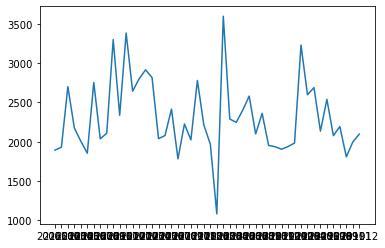

In [191]:
plt.plot(x,y)

In [192]:
df = df.set_index(df.iloc[:,0])
df.index

Index(['201601', '201602', '201603', '201604', '201605', '201606', '201607',
       '201608', '201609', '201610', '201611', '201612', '201701', '201702',
       '201703', '201704', '201705', '201706', '201707', '201708', '201709',
       '201710', '201711', '201712', '201801', '201802', '201803', '201804',
       '201805', '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201901', '201902', '201903', '201904', '201905', '201906',
       '201907', '201908', '201909', '201910', '201911', '201912'],
      dtype='object', name='ga:yearMonth')

## Rolling statitics : 評估模型隨時間的穩定性

時間序列模型的滾動分析通常用於評估模型隨時間的穩定性。
在使用統計模型分析財務時間序列數據時，一個關鍵的假設是模型的參數隨時間是恆定的。
但是，經濟環境通常會發生很大變化，因此假設模型的參數恆定是不合理的。
評估模型參數恆定性的一種常用技術是在整個樣本的固定大小的滾動窗口上計算參數估計值。
如果參數在整個樣本中確實是恆定的，則滾動窗口的估計值應該不會有太大差異。
如果參數在採樣過程中的某個時刻發生了變化，那麼滾動估算應可以捕獲這種不穩定性。

In [193]:
from matplotlib import rcParams


In [194]:
dataset = df
dataset['ga:yearMonth'] = pd.to_datetime(dataset['ga:yearMonth'],infer_datetime_format=True,format='%Y%m')
indexDataset = dataset.set_index(df.iloc[:,0])
indexDataset['ga:yearMonth']= pd.to_datetime(indexDataset['ga:yearMonth'])

In [195]:
indexDataset.head()

,ga:yearMonth,ga:newUsers
ga:yearMonth,,
2016-01-01,2016-01-01,1893
2016-02-01,2016-02-01,1931
2016-03-01,2016-03-01,2700
2016-04-01,2016-04-01,2175
2016-05-01,2016-05-01,2006


In [196]:
indexDataset = indexDataset.drop("ga:yearMonth", axis = 1)
indexDataset

,ga:newUsers
ga:yearMonth,
2016-01-01,1893
2016-02-01,1931
2016-03-01,2700
2016-04-01,2175
2016-05-01,2006
2016-06-01,1854
2016-07-01,2753
2016-08-01,2037
2016-09-01,2108


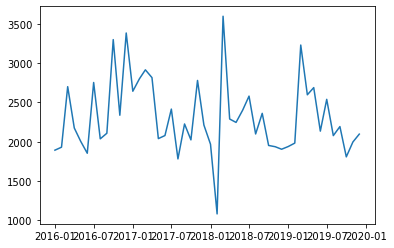

In [197]:
plt.plot(indexDataset)

In [198]:
print(indexDataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2016-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ga:newUsers  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes
None


In [199]:
#determine rolling statistics
rolmean = indexDataset.rolling(window=12).mean()
rolstd = indexDataset.rolling(window=12).std()
print(rolstd)

              ga:newUsers
ga:yearMonth             
2016-01-01            NaN
2016-02-01            NaN
2016-03-01            NaN
2016-04-01            NaN
2016-05-01            NaN
2016-06-01            NaN
2016-07-01            NaN
2016-08-01            NaN
2016-09-01            NaN
2016-10-01            NaN
2016-11-01            NaN
2016-12-01     537.542359
2017-01-01     519.958936
2017-02-01     503.602898
2017-03-01     514.699648
2017-04-01     508.196425
2017-05-01     504.795788
2017-06-01     478.820797
2017-07-01     478.970511
2017-08-01     509.556313
2017-09-01     501.301911
2017-10-01     464.548526
2017-11-01     471.836355
2017-12-01     383.758921
2018-01-01     393.279558
2018-02-01     506.052249
2018-03-01     619.501039
2018-04-01     594.099950
2018-05-01     591.783815
2018-06-01     591.866251
2018-07-01     597.889546
2018-08-01     581.359450
2018-09-01     581.274123
2018-10-01     584.725130
2018-11-01     572.042188
2018-12-01     579.593196
2019-01-01  

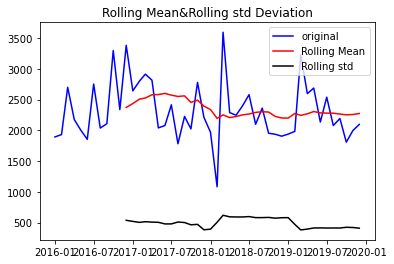

In [200]:
# plot rolling statistics
orig = plt.plot(indexDataset,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean&Rolling std Deviation')
plt.savefig("Rolling Mean&Rolling std Deviation.png")
plt.show()

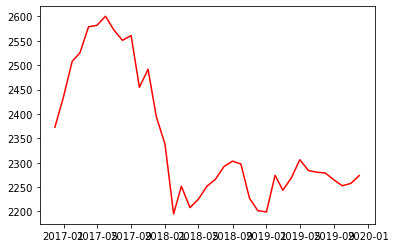

In [201]:
#週期性波動
movingAverage = indexDataset.rolling(window=12).mean()
movingStd = indexDataset.rolling(window=12).std()
plt.plot(movingAverage, color='red')

In [202]:
#perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-fuller Test:")
dftest =  adfuller(indexDataset['ga:newUsers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Results of Dickey-fuller Test:
Test statistic                 -4.046516
p-value                         0.001186
Lag Used                        1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [203]:
# p-value 接近0 -> 平穩
# 0.001186 > -3.581258,-2.926785, -2.601541 -> 代表拒絕虛無假設(reject null hypothesis)

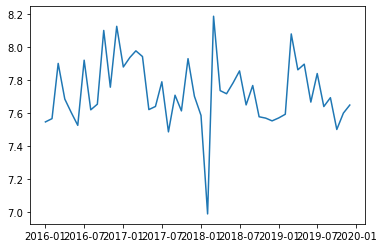

In [204]:
#estiminate trend
indexDataset_logScale =np.log(indexDataset)
plt.plot(indexDataset_logScale)

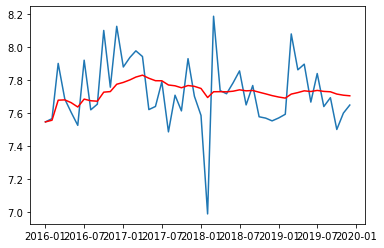

In [205]:
#加權平均
exponentiaDecayWeighted = indexDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexDataset_logScale)
plt.plot(exponentiaDecayWeighted,color='red')

In [206]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    # plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean&Rolling std Deviation')
    #perform dickey-fuller test
    print("Results of Dickey-fuller Test:")
    dftest =   adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','Lag Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

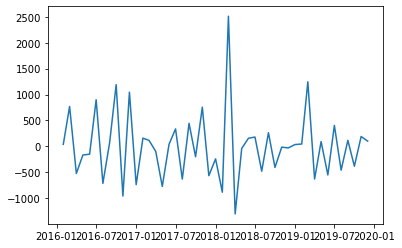

In [207]:
datasetlogDiffershifting = indexDataset - indexDataset.shift()
plt.plot(datasetlogDiffershifting) # 多少次微分一個時間序列 re模型參數B

Results of Dickey-fuller Test:
Test statistic                -6.660993e+00
p-value                        4.847727e-09
Lag Used                       2.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


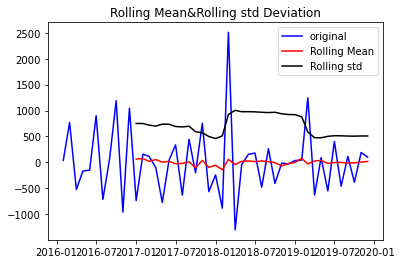

In [208]:
datasetlogDiffershifting.dropna(inplace = True)
test_stationarity(datasetlogDiffershifting)

In [209]:
# 取log變不平穩

## 第二種

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexDataset)

trend = decomposition.trend
seasonal = decomposition.trend
residual = decomposition.resid

In [211]:
residual

ga:yearMonth
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01           NaN
2016-05-01           NaN
2016-06-01           NaN
2016-07-01    120.003472
2016-08-01    -52.052083
2016-09-01   -277.107639
2016-10-01    697.184028
2016-11-01   -202.565972
2016-12-01    696.350694
2017-01-01    278.322917
2017-02-01    686.628472
2017-03-01   -482.579861
2017-04-01    126.072917
2017-05-01   -397.343750
2017-06-01   -230.913194
2017-07-01   -179.913194
2017-08-01   -101.968750
2017-09-01    134.267361
2017-10-01   -254.315972
2017-11-01    603.350694
2017-12-01   -120.940972
2018-01-01    -66.968750
2018-02-01   -747.454861
2018-03-01    456.795139
2018-04-01   -192.385417
2018-05-01     19.572917
2018-06-01    319.545139
2018-07-01    150.795139
2018-08-01    244.906250
2018-09-01    233.725694
2018-10-01   -351.982639
2018-11-01   -309.899306
2018-12-01   -484.524306
2019-01-01   -120.468750
2019-02-01    151.711806
2019-03-01    116.670139
2019-04-01  

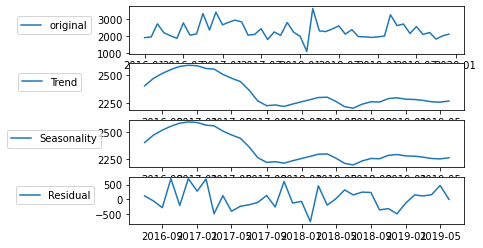

In [212]:
plt.subplot(411)
plt.plot(indexDataset, label='original')
plt.legend(bbox_to_anchor=(-0.1, 0.9))
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(-0.13, 0.9))
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(bbox_to_anchor=(-0.07, 0.9))
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(bbox_to_anchor=(-0.09, 0.9))
plt.tight_layout
plt.savefig("NewUser_TimeSeries.png")

decompositionLodData = residual
decompositionLodData.dropna(inplace=True)

Results of Dickey-fuller Test:
Test statistic                 -3.958419
p-value                         0.001645
Lag Used                        5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


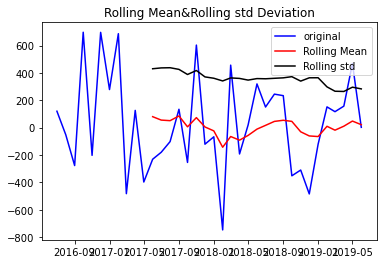

In [213]:
decompositionLodData = residual
test_stationarity(decompositionLodData)

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

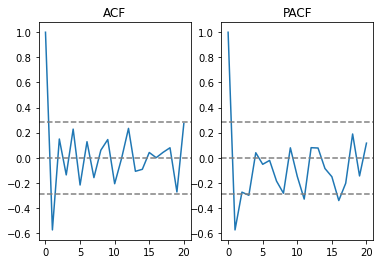

In [214]:
from statsmodels.tsa.stattools import acf, pacf
# 確定參數
datasetlogDiffershifting.dropna(inplace=True)
lag_acf = acf(datasetlogDiffershifting , nlags=20)
lag_pacf = pacf(datasetlogDiffershifting , nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffershifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffershifting)),linestyle='--',color='gray')
plt.title('ACF') #參數
plt.subplot(122)
plt.plot(lag_pacf) #P參數
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogDiffershifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogDiffershifting)),linestyle='--',color='gray')
plt.title('PACF')

In [215]:
from pmdarima.arima import ndiffs
d =  ndiffs(indexDataset["ga:newUsers"],  test="adf")
print(d) # 1

1


In [216]:
#AR模型就是以前期的資料來預測本期的資料，而且越接近本期的資料，對預測結果的影響力就越大

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 10940370.0230')

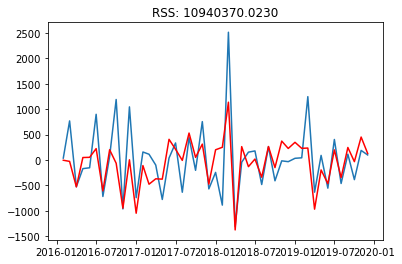

In [217]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexDataset,order=(2,1,2))
result_AR = model.fit(disp=-1)
plt.plot(datasetlogDiffershifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("RSS: %.4f" %sum((result_AR.fittedvalues-datasetlogDiffershifting['ga:newUsers'])**2))

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 11293843.6725')

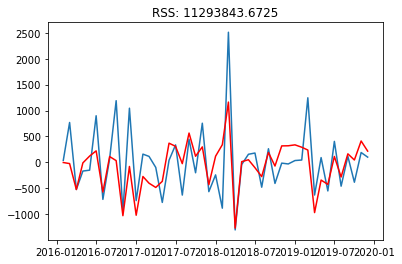

In [218]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexDataset,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogDiffershifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title("RSS: %.4f" %sum((results_MA.fittedvalues-datasetlogDiffershifting['ga:newUsers'])**2))

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 10940370.0230')

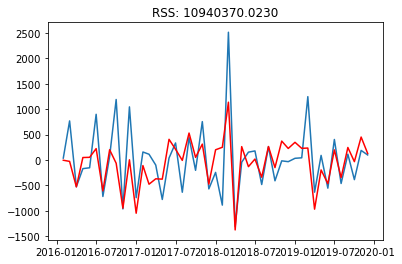

In [219]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexDataset,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogDiffershifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title("RSS: %.4f" %sum((results_ARIMA.fittedvalues-datasetlogDiffershifting['ga:newUsers'])**2))

In [220]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

ga:yearMonth
2016-02-01     -3.798408
2016-03-01    -26.772754
2016-04-01   -527.573949
2016-05-01     49.458016
2016-06-01     53.323492
dtype: float64


In [221]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())
print(indexDataset.head())

ga:yearMonth
2016-02-01     -3.798408
2016-03-01    -30.571161
2016-04-01   -558.145111
2016-05-01   -508.687095
2016-06-01   -455.363603
dtype: float64
              ga:newUsers
ga:yearMonth             
2016-01-01           1893
2016-02-01           1931
2016-03-01           2700
2016-04-01           2175
2016-05-01           2006


In [222]:
predictions_ARIMA_diff= predictions_ARIMA_diff.add(2000)

Text(0.5, 1.0, 'ARIMA model')

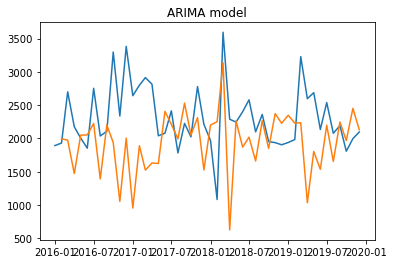

In [223]:
plt.plot(indexDataset)
plt.plot(predictions_ARIMA_diff)
plt.title('ARIMA model')

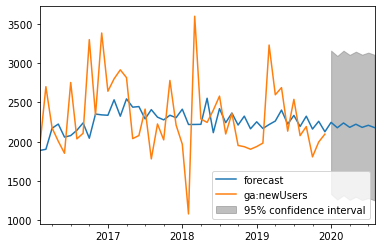

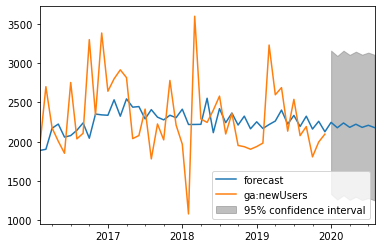

In [232]:
results_ARIMA.plot_predict(1,55)